**MATPLOTLIB - FORMATTING CHARTS**

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\VINAMRA SHUKLA\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Let's start by creating a sobplot on basically a one by one figure.

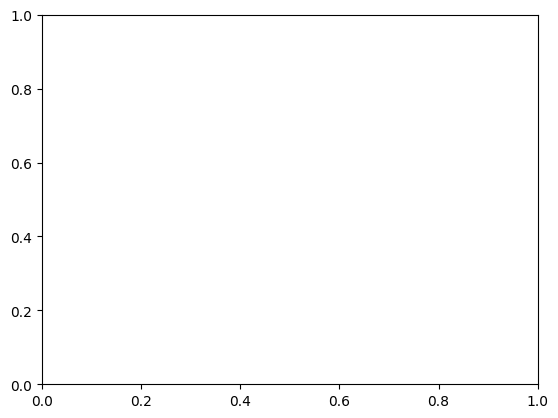

In [5]:
fig, ax = plt.subplots()

A 2 by 2 figure....

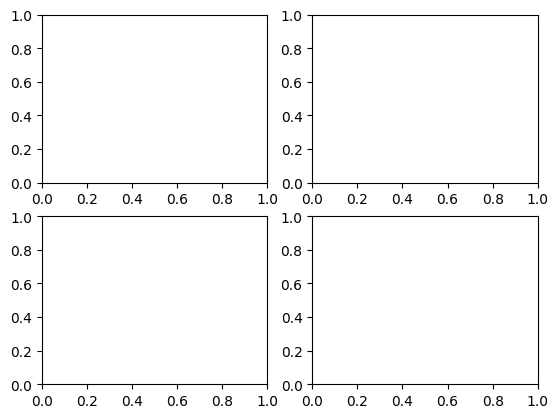

In [6]:
fig, ax = plt.subplots(2, 2)

Working with the 1 by 1 for now...

<Axes: xlabel='job_title_short'>

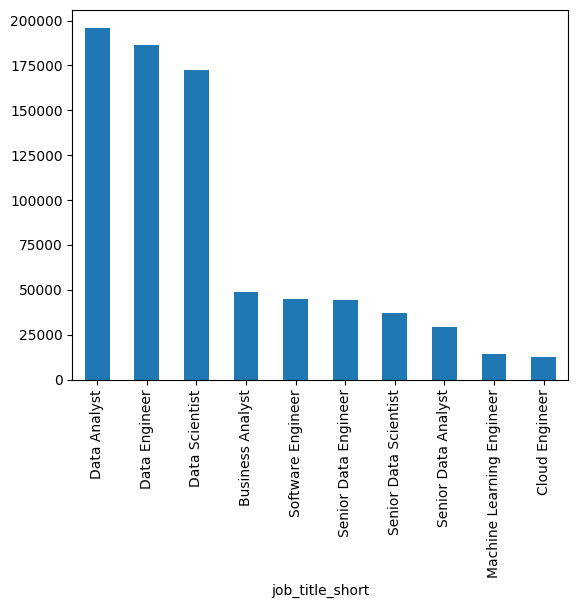

In [7]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind = 'bar')

With this, we need to start using the 'ax' and we can pass in this 'ax' for the figure itself

<Axes: xlabel='job_title_short'>

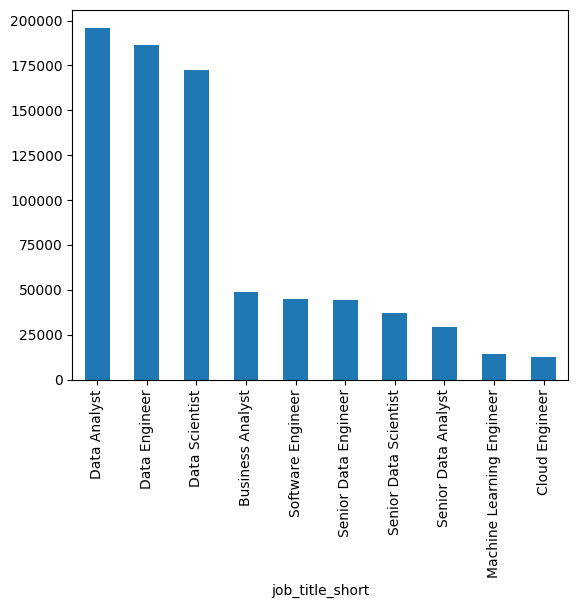

In [8]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax)

Didn't did much. But let's now get into plotting 2 plots...

In [9]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [11]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

Let's plot both of these on seperate bar charts in the same figure.

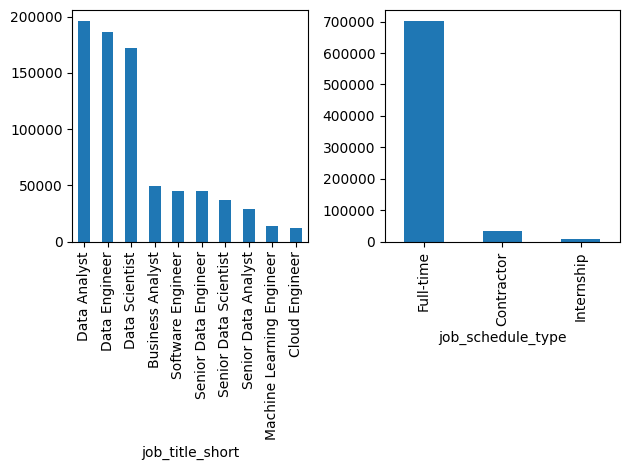

In [14]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind = 'bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind = 'bar', ax = ax[1])           # we are using pandas methods to plot these things till now.

fig.tight_layout()                                          # fixes the overlapping issues.

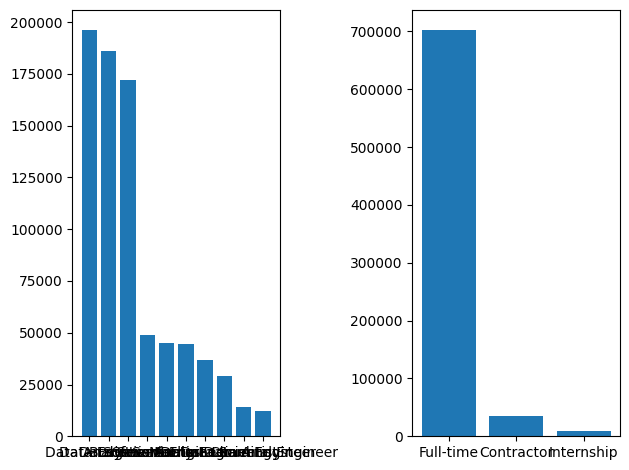

In [19]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))         # this is a Matplotlib method, as we can see the output, pandas method is more efficient than this.

fig.tight_layout()

**Example:** Counts of Top Skills in Job Postings

In [21]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


We are going to loop through the three job titles below, basically pulling them out from the dataframe and plotting them each individually to our figure.

Creating a list....

In [23]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

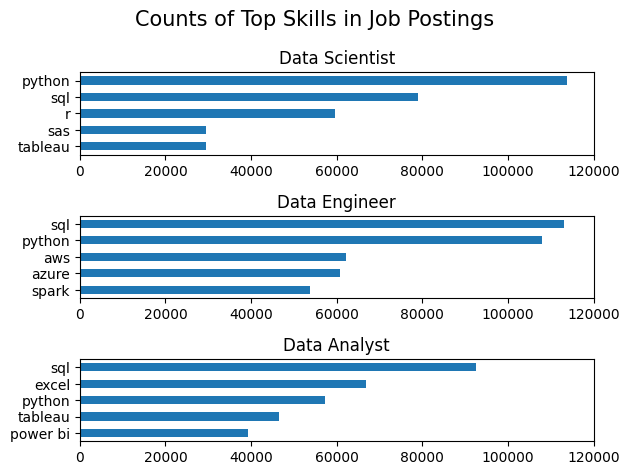

In [27]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind ='barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()
